In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
sns.__version__

'0.13.2'

In [7]:
# datasets do seaborn

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [9]:
# lendo a base de dados do seaborn

df = sns.load_dataset('tips')

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [12]:
# plots de distruição

df["total_bill"].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

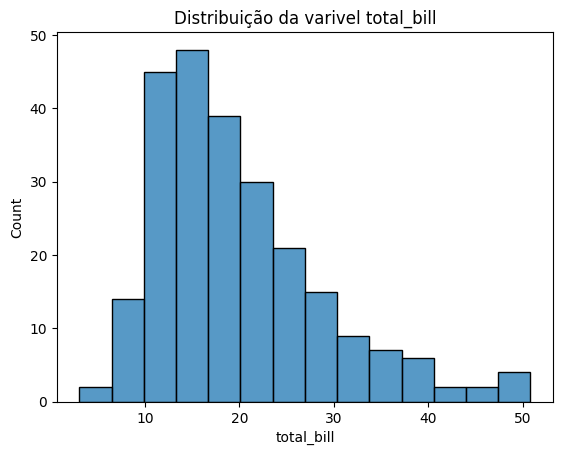

In [15]:
plt.title("Distribuição da varivel total_bill")
sns.histplot(data=df, x="total_bill")
plt.show()

<Axes: xlabel='total_bill', ylabel='Count'>

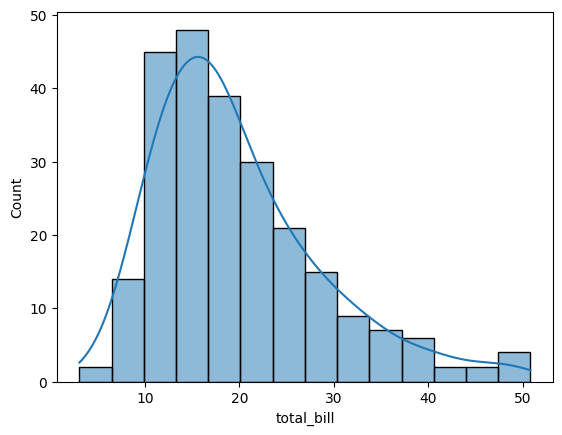

In [16]:
sns.histplot(data=df, x="total_bill", kde=True)

<Axes: xlabel='total_bill', ylabel='Density'>

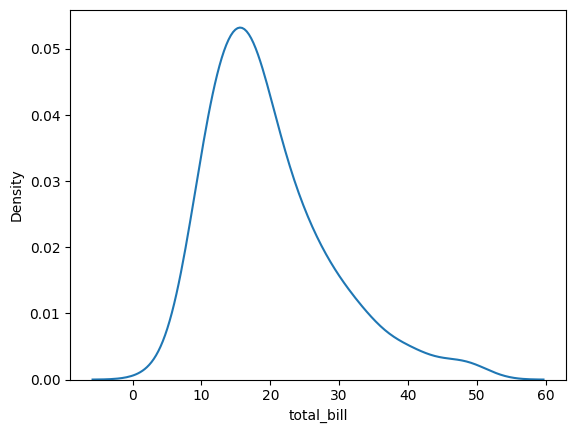

In [17]:
sns.kdeplot(data=df, x="total_bill")

In [18]:
df["size"].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

<Axes: xlabel='total_bill', ylabel='Count'>

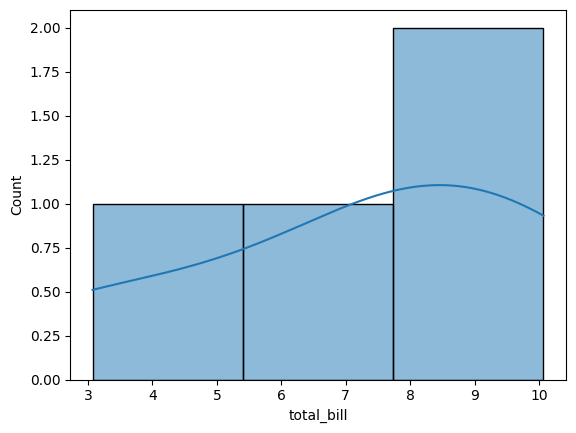

In [19]:
sns.histplot(data=df.query("size == 1"), x="total_bill", kde=True)

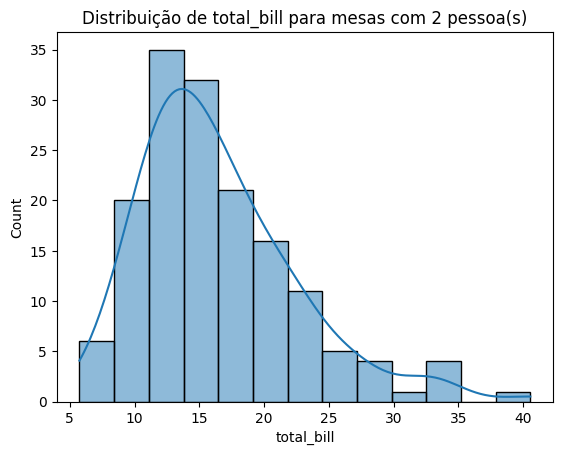

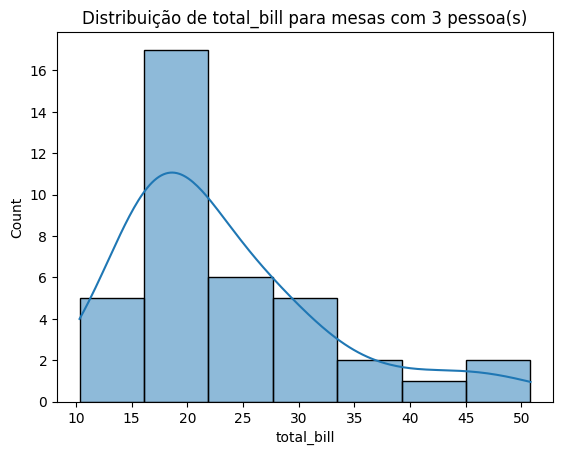

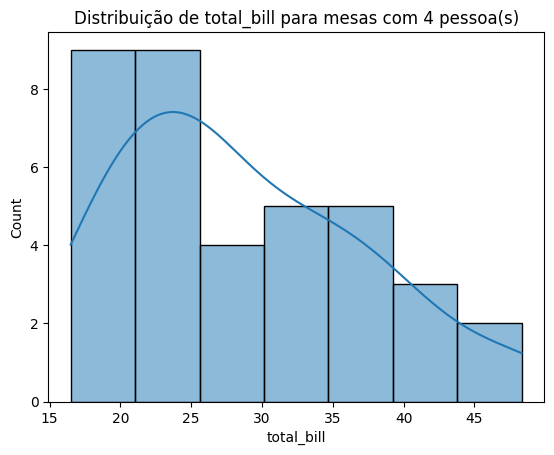

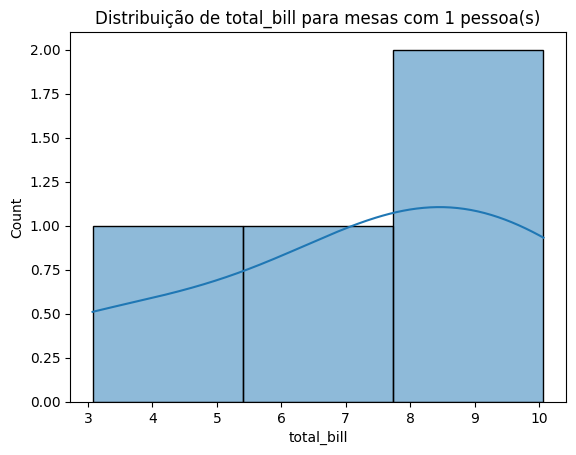

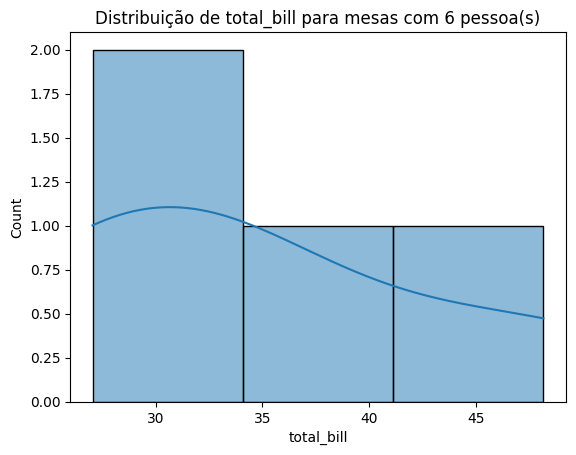

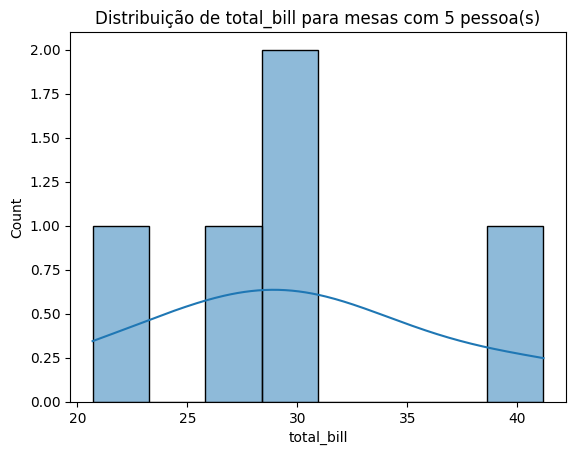

In [21]:
for tamanho in df["size"].unique():
    plt.title(f"Distribuição de total_bill para mesas com {tamanho} pessoa(s)")
    sns.histplot(data=df.query(f"size == {tamanho}"), x="total_bill", kde=True)
    plt.show()

<Axes: xlabel='total_bill', ylabel='Count'>

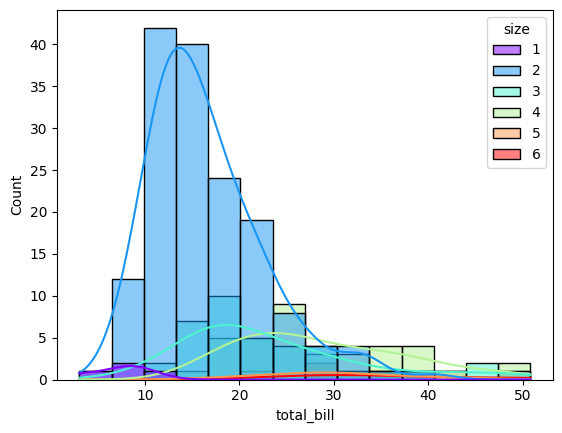

In [22]:
sns.histplot(data=df, x="total_bill", kde=True, hue="size", palette="rainbow")

<Axes: xlabel='total_bill', ylabel='size'>

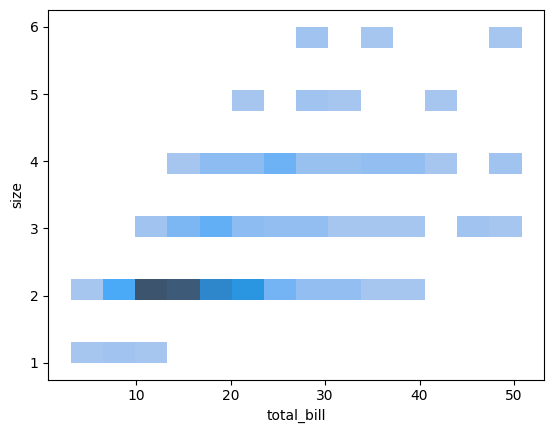

In [23]:
# distruição em duas dimensões

sns.histplot(data=df, x="total_bill", y="size")

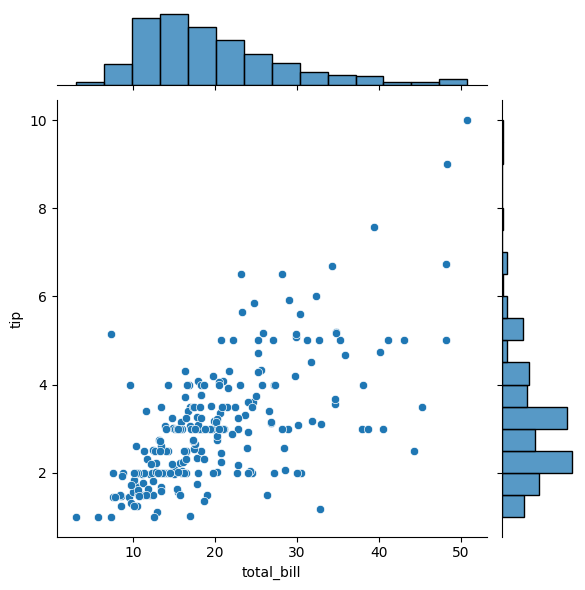

In [25]:
# joinplot

sns.jointplot(data=df, x="total_bill", y="tip")
plt.show()

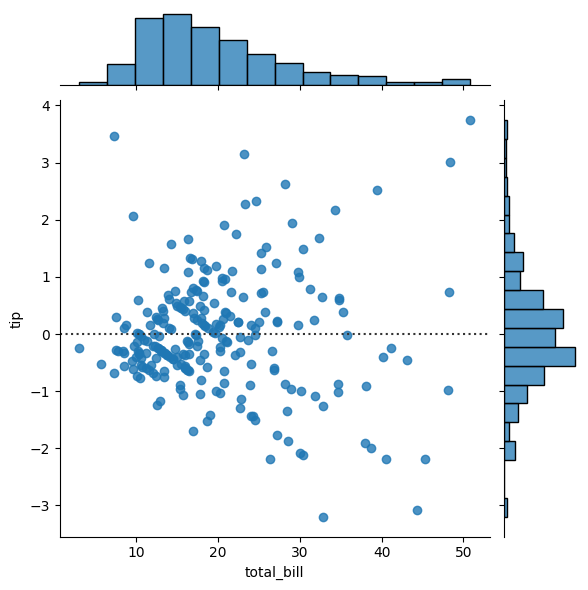

In [29]:
sns.jointplot(data=df, x="total_bill", y="tip", kind="resid")
plt.show()

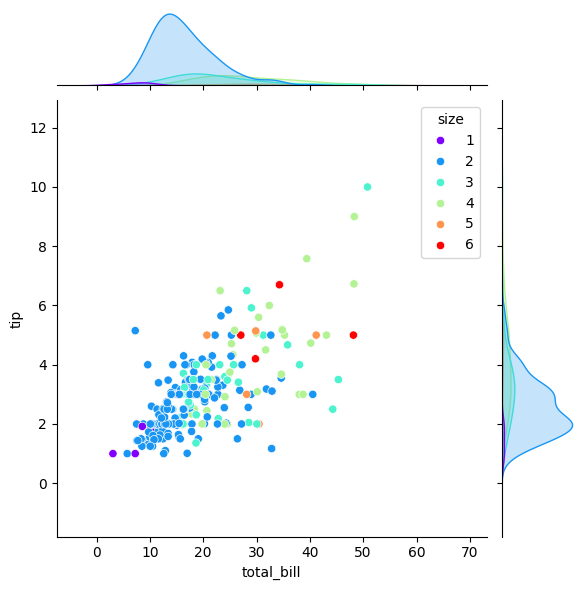

In [31]:
sns.jointplot(data=df, x="total_bill", y="tip", hue="size", palette="rainbow")
plt.show()

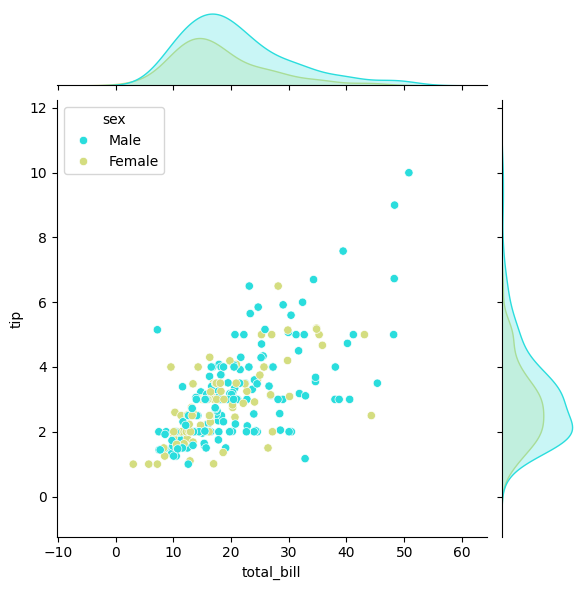

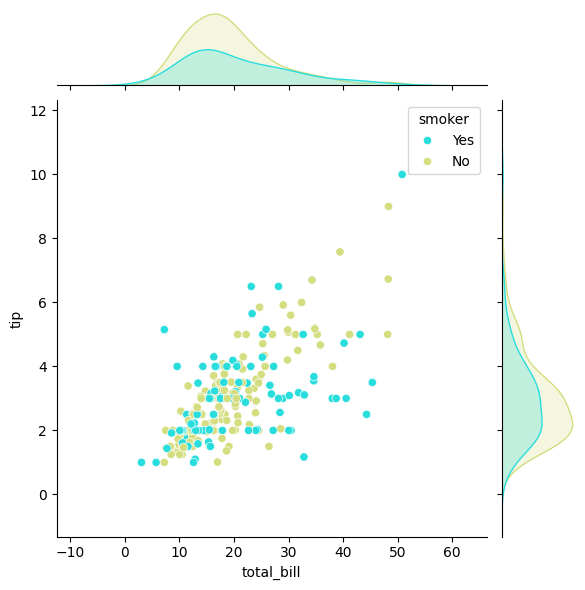

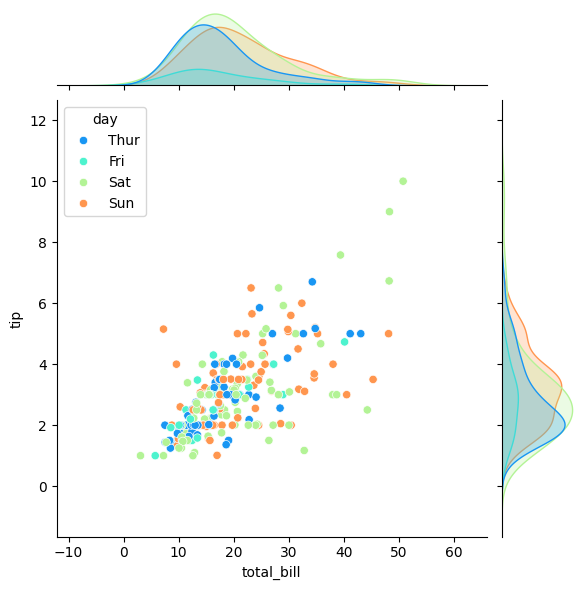

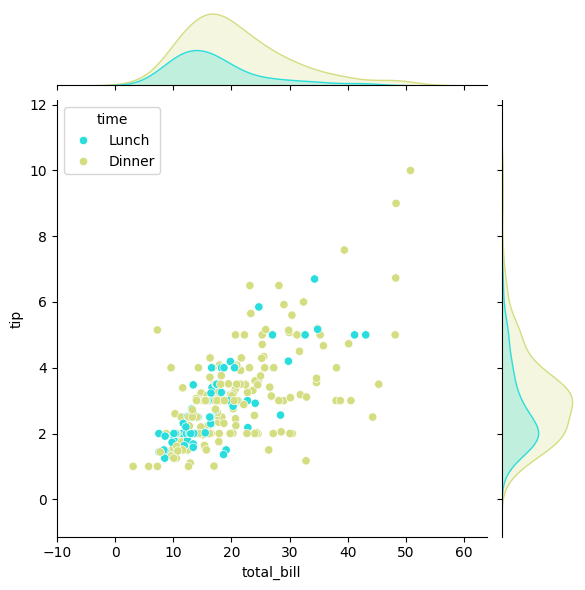

In [32]:
for col in df.select_dtypes(exclude=np.number):
    sns.jointplot(data=df, x="total_bill", y="tip", hue=col, palette="rainbow")
    plt.show()

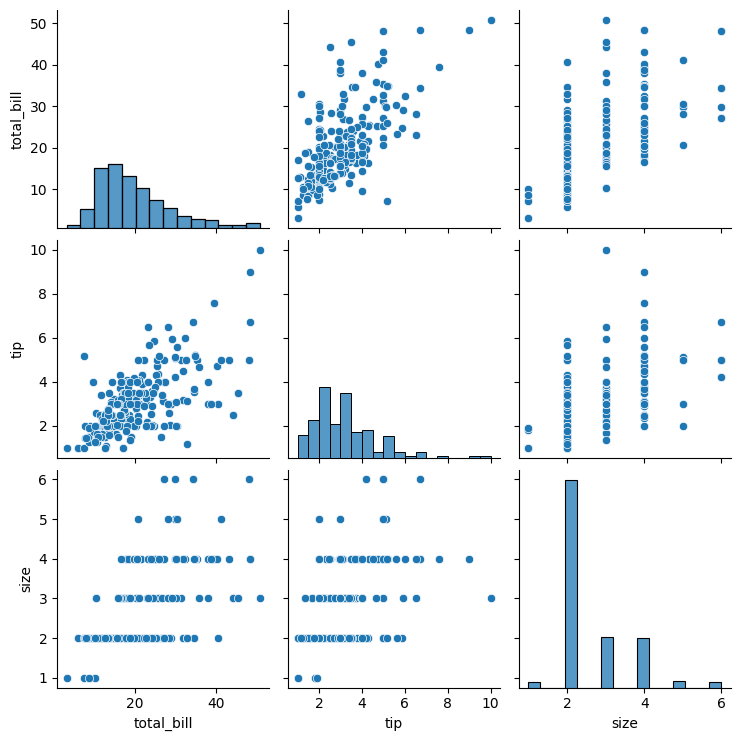

In [33]:
# pairplot

sns.pairplot(df)

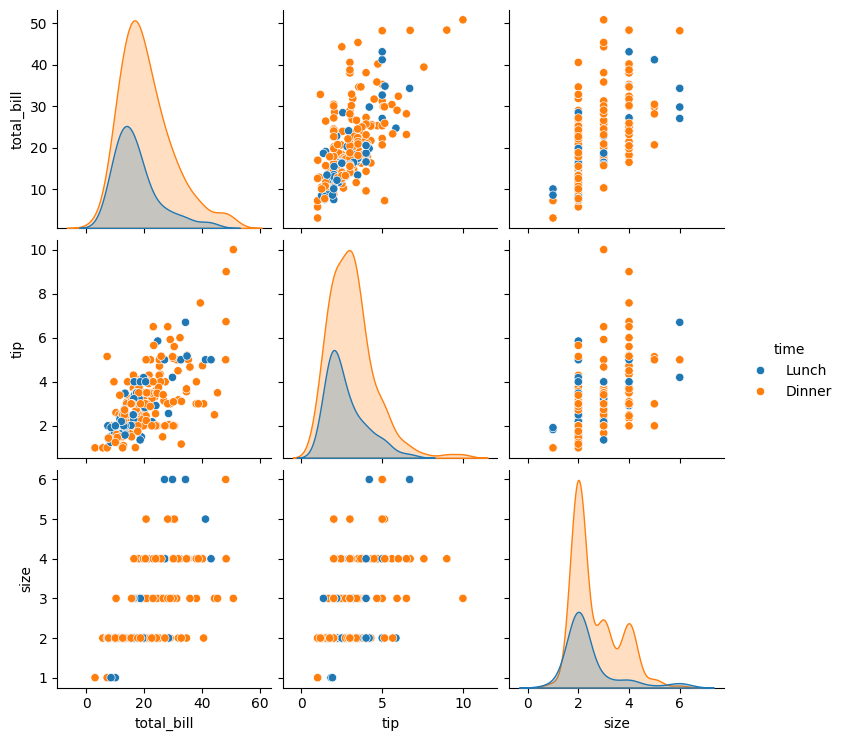

In [34]:
sns.pairplot(df, hue="time")

<Axes: xlabel='total_bill'>

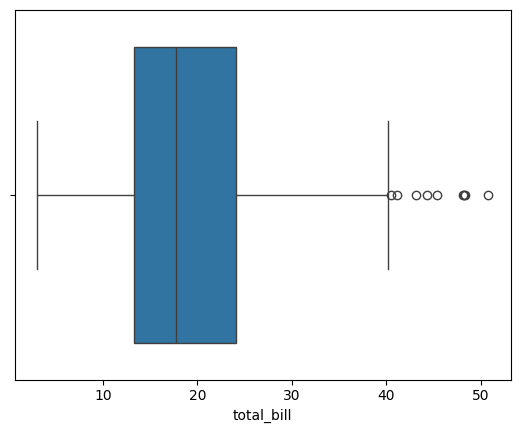

In [35]:
# boxplot

sns.boxplot(data=df, x="total_bill")

<Axes: xlabel='total_bill', ylabel='time'>

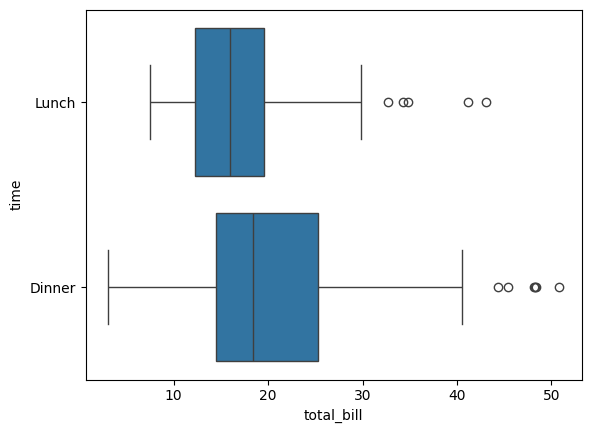

In [36]:
sns.boxplot(data=df, x="total_bill", y="time")

In [39]:
df.groupby(["time", "day"])[["total_bill"]].agg(["count", "median"])

C:\Users\Daniel\AppData\Local\Temp\ipykernel_9352\624426861.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["time", "day"])[["total_bill"]].agg(["count", "median"])


total_bill        
                 count  median
time   day                    
Lunch  Thur         61  16.000
       Fri           7  13.420
       Sat           0     NaN
       Sun           0     NaN
Dinner Thur          1  18.780
       Fri          12  18.665
       Sat          87  18.240
       Sun          76  19.630

<Axes: xlabel='total_bill', ylabel='time'>

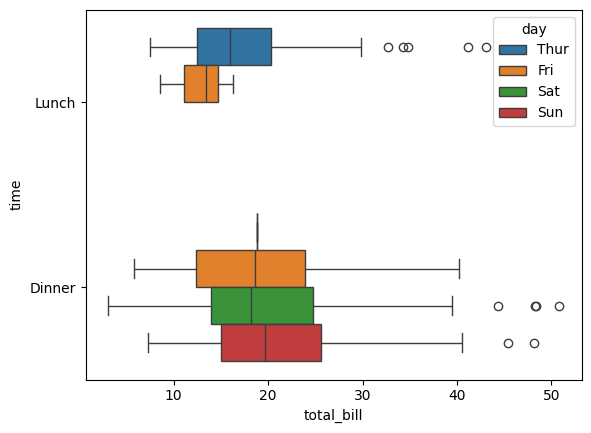

In [40]:
sns.boxplot(data=df, x="total_bill", y="time", hue="day")

<Axes: xlabel='total_bill', ylabel='time'>

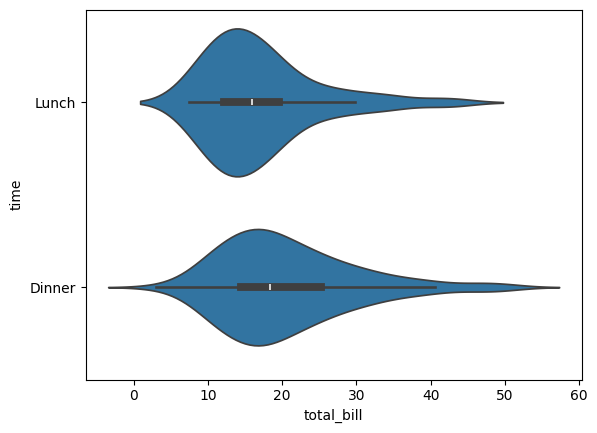

In [41]:
# violinplot

sns.violinplot(data=df, x="total_bill", y="time")

<Axes: xlabel='total_bill', ylabel='day'>

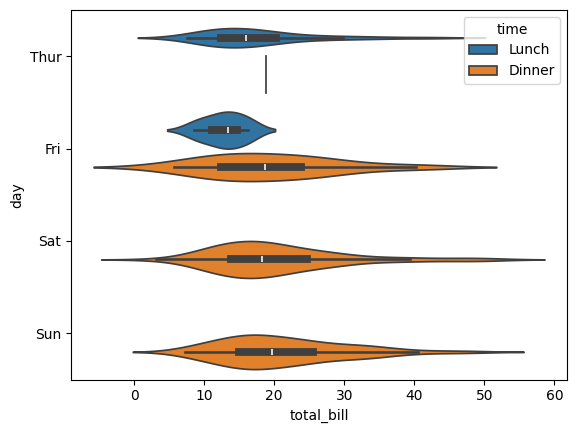

In [42]:
sns.violinplot(data=df, x="total_bill", y="day", hue="time")

<Axes: xlabel='total_bill', ylabel='day'>

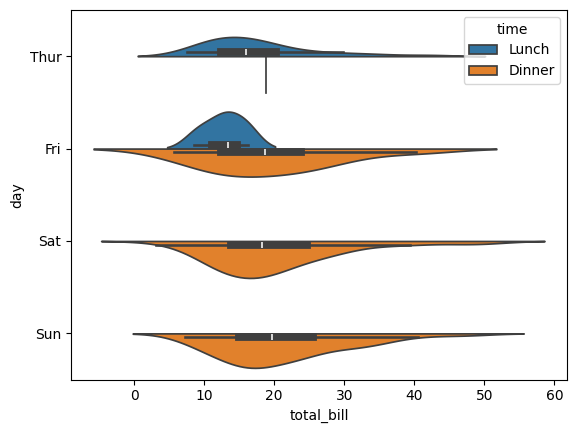

In [43]:
sns.violinplot(data=df, x="total_bill", y="day", hue="time", split=True)

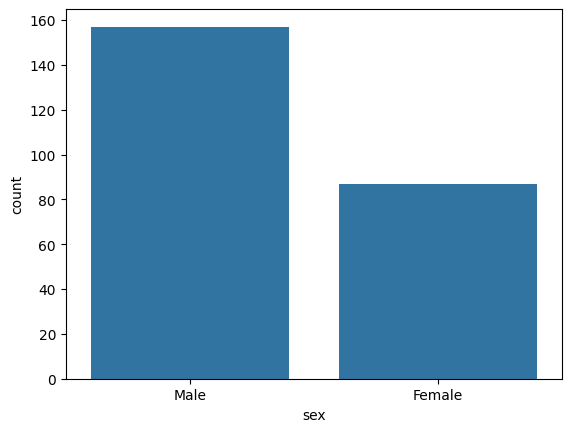

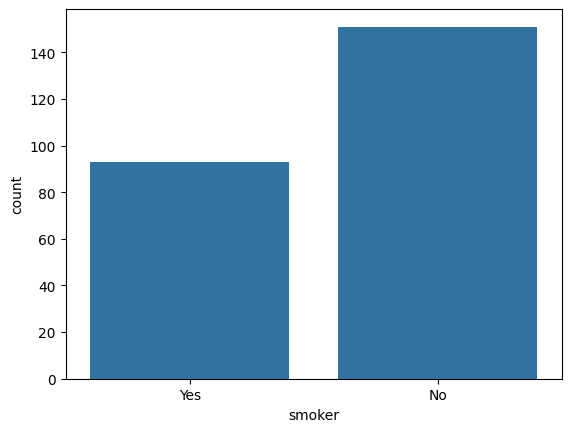

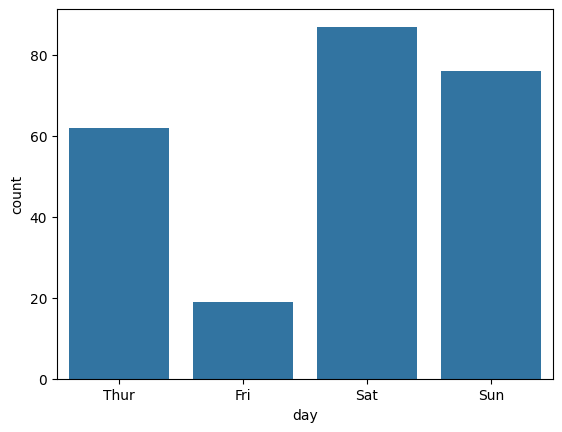

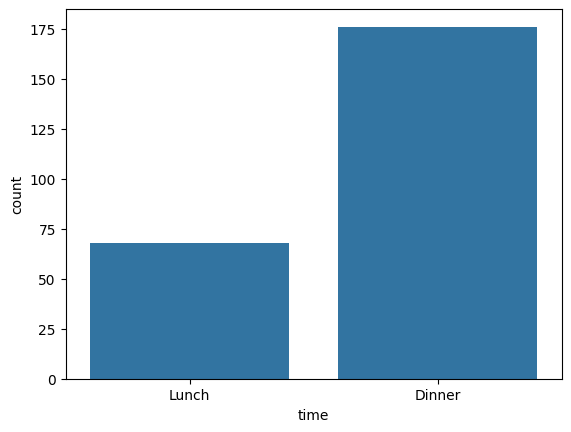

In [47]:
# plot categoricos

# countplot

for col in df.select_dtypes(exclude=np.number):

    sns.countplot(data=df, x=col)
    plt.show()